# پیاده سازی و بررسی الگوریتم GMM


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
sns.set_style('whitegrid')
%matplotlib inline

from scipy.stats import multivariate_normal

## ایجاد دیتاست

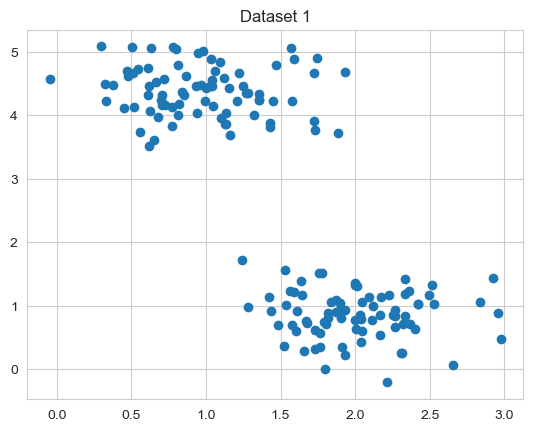

In [153]:
X, ـ = make_blobs(n_samples=[80,80], random_state=0, cluster_std=0.40)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Dataset 1")
plt.show()

## نرمال سازی داده ها
در این بخش، تابع نرمال سازی داده ها را تکمیل کنید.

In [154]:
def normalize_data(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    normalized_X = (X - min_val)/(max_val - min_val)
    return normalized_X


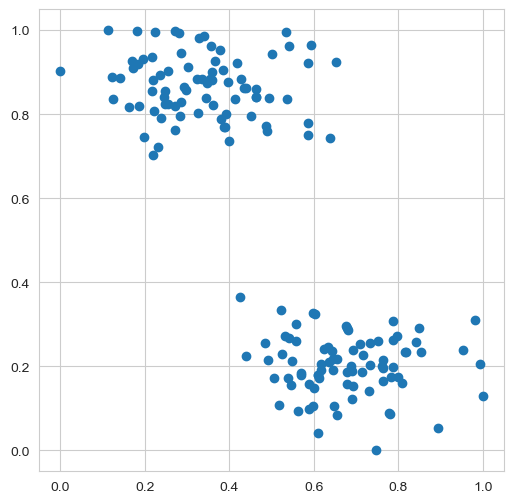

In [155]:
plt.figure(figsize=[6, 6])
X_norm = normalize_data(X)
plt.scatter(X_norm[:, 0], X_norm[:, 1]);

## تابع لگاریتم شباهت
در این بخش تایغ لگاریتم شباهت را برای تمکیل کنید

In [156]:
def gmm_log_likelihood(X, means, covs, mixing_coefs):
    final_like = 0.0
    
    for n in range(X.shape[0]):
        nth_like = 0.0
        for k in range(means.shape[0]):
            normal_XnCk = multivariate_normal.pdf(X[n], mean=means[k], cov=covs[k])
            nth_like += mixing_coefs[k] * normal_XnCk 
        final_like += np.log(nth_like)
    
    return final_like

## E step
تابع زیر را تکمیل کنید.

In [157]:
def e_step(X, means, covs, mixing_coefs):
    responsibilities = np.zeros((X.shape[0], means.shape[0]))
    
    for n in range(X.shape[0]):
        sum_res = 0.0
        for k in range(means.shape[0]):
            normal_XnCk = multivariate_normal.pdf(X[n], mean=means[k], cov=covs[k])
            responsibilities[n, k] = mixing_coefs[k] * normal_XnCk
            sum_res += responsibilities[n, k] 
        responsibilities[n, :] /= sum_res
    
    return responsibilities

## M step

تابع زیر را تکمیل کنید.


In [158]:
def update_covariances(X, n_k, covs):
    for k in range(len(n_k)):
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        for n in range(X.shape[0]):
            diff = (X[n] - means[k]).reshape(-1, 1)
            cov_k += responsibilities[n, k] * np.dot(diff, diff.T)
        covs.append(cov_k / n_k[k])
    return covs
    
def update_means(X, n_k, means):
    means = np.zeros((len(n_k), X.shape[1]))
    for k in range(len(n_k)):
        mean_k = np.zeros(X.shape[1])  
        for n in range(X.shape[0]):    
            mean_k += responsibilities[n, k] * X[n]  
        means[k] = mean_k / n_k[k]
        means.append
    return means
    
def m_step(X, responsibilities):
    means, covs, mixing_coefs = [], [], []
    n_k = np.sum(responsibilities, axis=0)  
    
    covs = update_covariances(X, n_k, covs)
    means = update_means(X, n_k, means)
    mixing_coefs = n_k / X.shape[0]
    
    return means, np.array(covs), mixing_coefs

## نمایش توابع گوسی و داده ها
این تابع از پیش آماده، روند اجرای الگوریتم را برای ما نمایش می دهد.

In [159]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.0):

    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [160]:
def plot_gmm_2d(X, responsibilities, means, covs, mixing_coefs):

    plt.figure(figsize=[6, 6])
    palette = np.array(sns.color_palette('colorblind', n_colors=3))[[0, 2]]
    colors = responsibilities.dot(palette)
    # Plot the samples colored according to p(z|x)
    plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
    # Plot locations of the means
    for ix, m in enumerate(means):
        plt.scatter(m[0], m[1], s=300, marker='X', c=palette[ix],edgecolors='k', linewidths=1,)
    # Plot contours of the Gaussian
    x = np.linspace(0, 1, 50)
    y = np.linspace(0, 1, 50)
    xx, yy = np.meshgrid(x, y)
    for k in range(len(mixing_coefs)):
        zz = bivariate_normal(xx, yy, np.sqrt(covs[k][0, 0]),np.sqrt(covs[k][1, 1]),means[k][0], means[k][1], covs[k][0, 1])
        plt.contour(xx, yy, zz, 2, colors='k')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

## اجرای الگوریتم
پس از تمکیل بخش های قبلی، با اجرای بلاک زیر روند اجرا را بر روی داده ها تحلیل کنید.

At initialization: log-likelihood = -66.64234962353135


C:\Users\USER\AppData\Local\Temp\ipykernel_2712\36623720.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(m[0], m[1], s=300, marker='X', c=palette[ix],edgecolors='k', linewidths=1,)


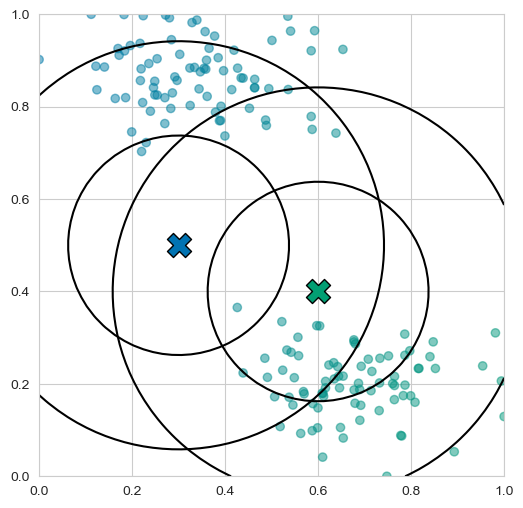

Iteration 0: log-likelihood = 25.91, improvement = 92.55


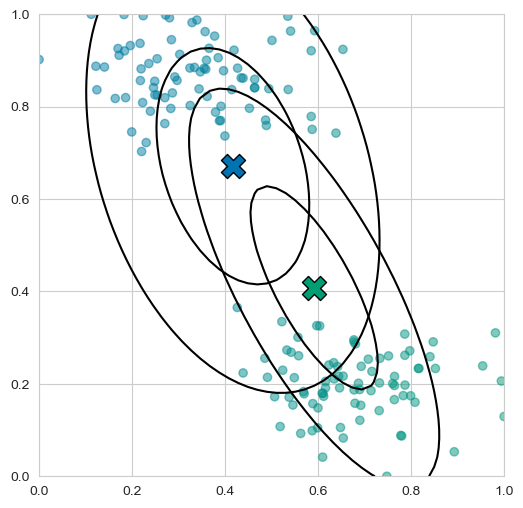

Iteration 1: log-likelihood = 43.65, improvement = 17.74


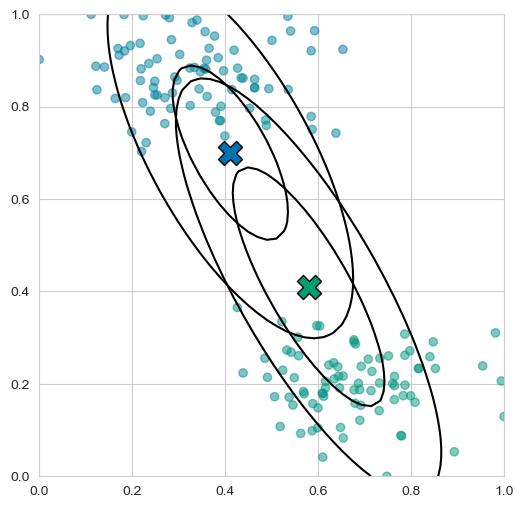

Iteration 2: log-likelihood = 45.06, improvement = 1.41


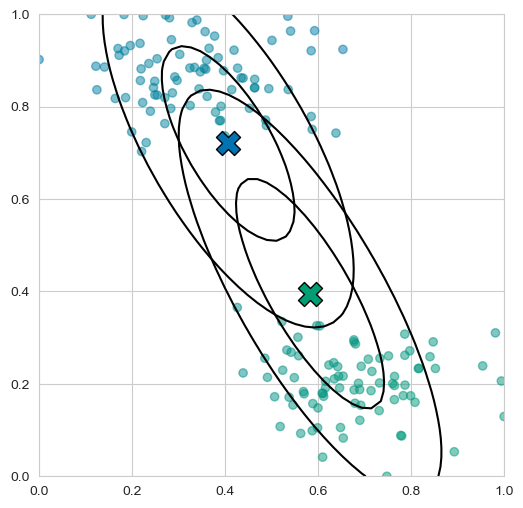

Iteration 3: log-likelihood = 47.46, improvement = 2.40


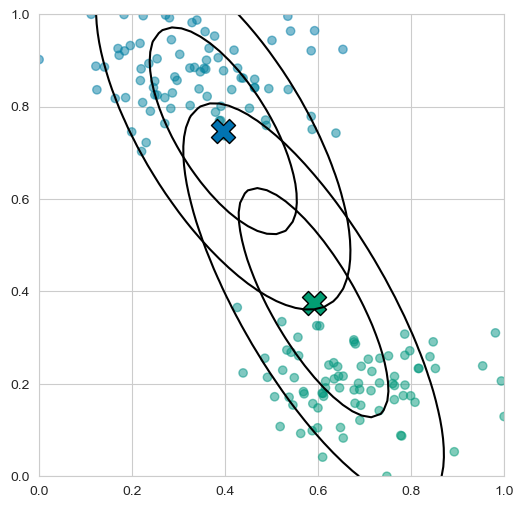

Iteration 4: log-likelihood = 54.07, improvement = 6.60


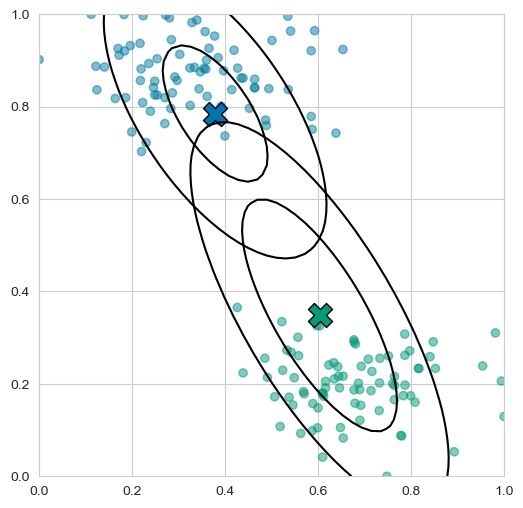

Iteration 5: log-likelihood = 77.00, improvement = 22.93


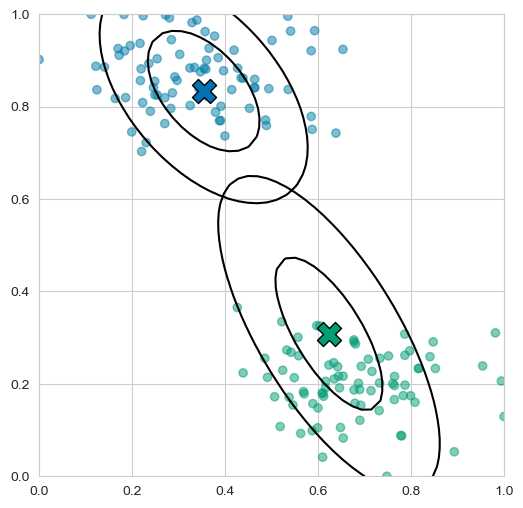

Iteration 6: log-likelihood = 130.31, improvement = 53.32


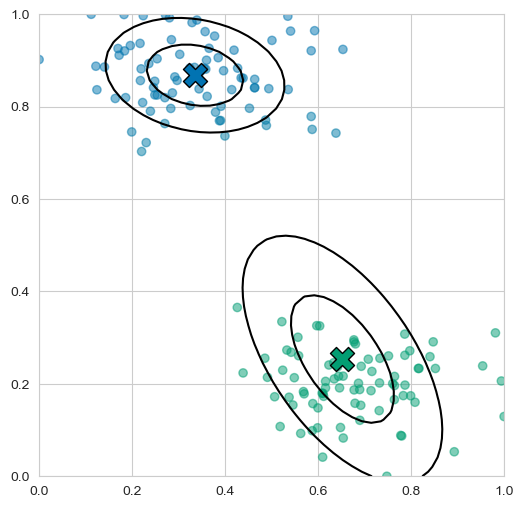

Iteration 7: log-likelihood = 172.66, improvement = 42.34


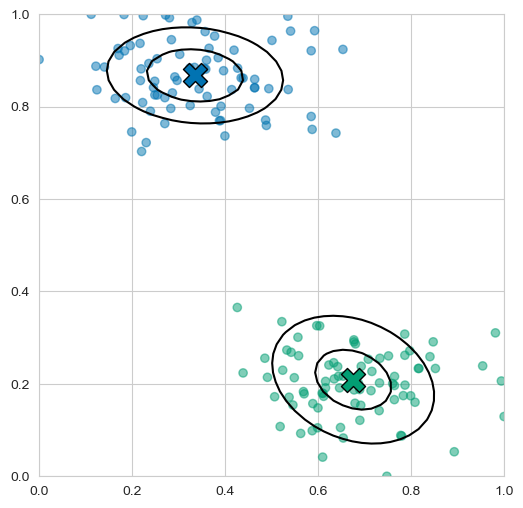

Iteration 8: log-likelihood = 182.26, improvement = 9.61


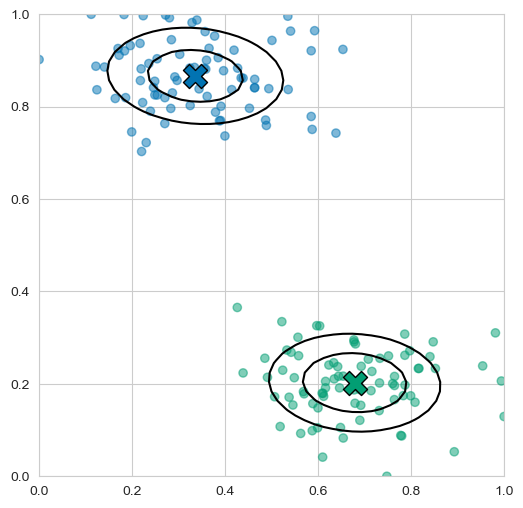

Iteration 9: log-likelihood = 182.26, improvement = 0.00


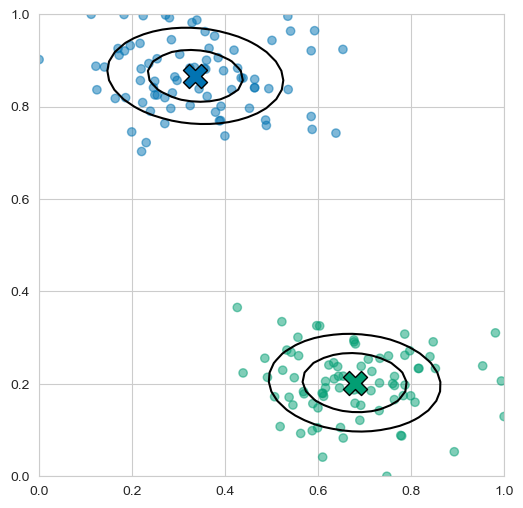

In [161]:
X_norm = normalize_data(X)

# Initialize the parameters(You can choose different starting parameters)
means = np.array([[0.3, 0.5], [0.6, 0.4]])
covs = np.array([0.1 * np.eye(2), 0.1 * np.eye(2)])
mixing_coefs = np.array([0.5, 0.5])
max_iters = 10

old_log_likelihood = gmm_log_likelihood(X_norm, means, covs, mixing_coefs)
responsibilities = e_step(X_norm, means, covs, mixing_coefs)
print('At initialization: log-likelihood = {0}'.format(old_log_likelihood))
plot_gmm_2d(X_norm, responsibilities, means, covs, mixing_coefs)

# Perform the EM iteration
for i in range(max_iters):
    responsibilities = e_step(X_norm, means, covs, mixing_coefs)
    means, covs, mixing_coefs = m_step(X_norm, responsibilities)
    new_log_likelihood = gmm_log_likelihood(X_norm, means, covs, mixing_coefs)
    # Report & visualize the optimization progress
    print('Iteration {0}: log-likelihood = {1:.2f}, improvement = {2:.2f}'.format(i, new_log_likelihood, new_log_likelihood - old_log_likelihood))
    old_log_likelihood = new_log_likelihood
    plot_gmm_2d(X_norm, responsibilities, means, covs, mixing_coefs)